In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import  LogisticRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/abalone.csv")

In [3]:
df.shape

(4177, 9)

In [4]:
df.isnull()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
4172,False,False,False,False,False,False,False,False,False
4173,False,False,False,False,False,False,False,False,False
4174,False,False,False,False,False,False,False,False,False
4175,False,False,False,False,False,False,False,False,False


In [5]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [6]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

Since there is no null value

In [7]:
df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [9]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [10]:
df['Rings'] = df ['Rings'].replace(0,df['Rings'].mean())

df['Length'] = df ['Length'].replace(0,df['Length'].mean())

df['Diameter'] = df ['Diameter'].replace(0,df['Diameter'].mean())

df['Height'] = df ['Height'].replace(0,df['Height'].mean())

df['Whole weight'] = df ['Whole weight'].replace(0,df['Whole weight'].mean())

In [18]:
shel = pd.get_dummies(df["Rings"])
shel.head()

,1,2,3,4,5,6,7,8,9,10,...,19,20,21,22,23,24,25,26,27,29
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
def Rings (x):
    if x == "Rings":
          return int(1)
    else:
        return int(0)
data_1 = df["Rings"].apply(Rings)
df ['Rings'] = data_1
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,0
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,0
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,0
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,0
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,0


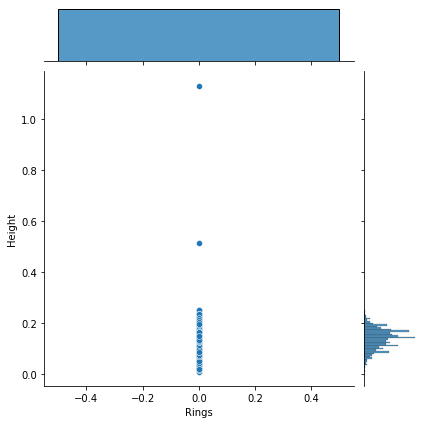

In [20]:
sns.jointplot(x='Rings',y='Height',data=df)

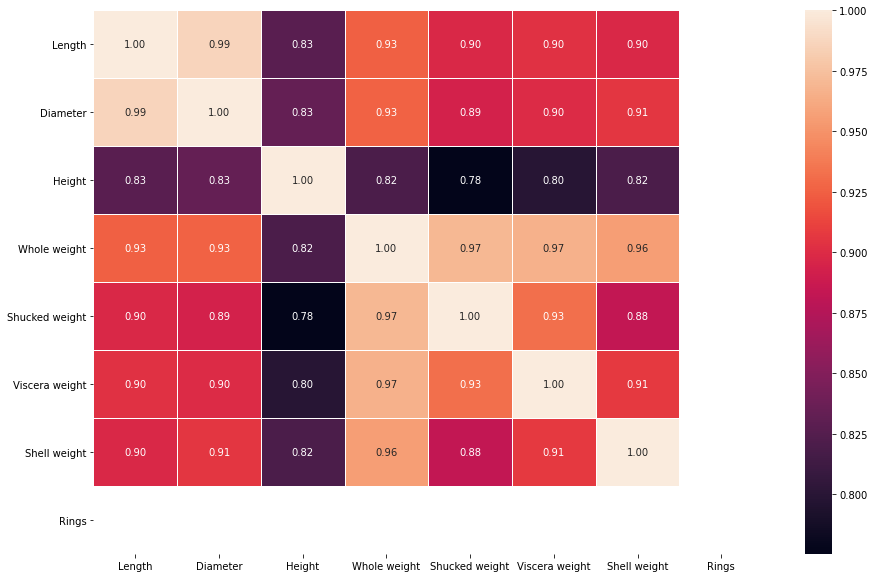

In [21]:
corr_matrix=df.corr()
fig,ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix,
               annot=True,
               linewidths=0.5,
               fmt=".2f"
              )

In [22]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [24]:
dfle = df
dfle.Rings = le.fit_transform(dfle.Rings)
dfle

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,0
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,0
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,0
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,0
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,0
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,0
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,0
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,0
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,0


In [25]:
X = dfle[['Rings','Shell weight']].values
X

array([[0.   , 0.15 ],
       [0.   , 0.07 ],
       [0.   , 0.21 ],
       ...,
       [0.   , 0.308],
       [0.   , 0.296],
       [0.   , 0.495]])

In [26]:
y = dfle.Rings
y

0       0
1       0
2       0
3       0
4       0
       ..
4172    0
4173    0
4174    0
4175    0
4176    0
Name: Rings, Length: 4177, dtype: int64

In [27]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

In [28]:
X = ohe.fit_transform(X).toarray()
X

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [29]:
X = X[:,1:]
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [30]:
model = LinearRegression()

In [31]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=4)
y_train.head()

1773    0
511     0
252     0
813     0
3748    0
Name: Rings, dtype: int64

In [32]:
model.fit(X_train,y_train)

LinearRegression()

In [33]:
model.score(X_train,y_train)

1.0

In [34]:
model.score(X_test,y_test)

1.0

In [35]:
y_pred=model.predict(X_test)

In [36]:
y_pred

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [37]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [38]:
y_pred = model.predict(X_test)

In [39]:
mean_absolute_error(y_test,y_pred)

0.0

In [40]:
mean_squared_error(y_test,y_pred)

0.0

In [41]:
np.sqrt(mean_squared_error(y_test,y_pred))

0.0

In [42]:
from sklearn.linear_model import Ridge,Lasso,RidgeCV, LassoCV

In [43]:
lasscv = LassoCV(alphas = None, max_iter = 1000, normalize = True) 
lasscv.fit (X_train, y_train)

LassoCV(normalize=True)

In [44]:
alpha = lasscv.alpha_
alpha

1e-15

In [45]:
lasso_reg = Lasso(alpha)
lasso_reg.fit(X_train, y_train)

Lasso(alpha=1e-15)

In [46]:
lasso_reg.score(X_test,y_test)

1.0

In [47]:
ridgecv = RidgeCV(alphas=np.arange(0.001,0.1,0.01),normalize =True)

ridgecv.fit(X_train,y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]),
        normalize=True)

In [48]:
ridgecv.alpha_

0.001

In [49]:
ridge_model = Ridge(alpha = ridgecv.alpha_)
ridge_model.fit(X_train, y_train)

Ridge(alpha=0.001)

In [50]:
ridge_model.score(X_test,y_test)

1.0